<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Обзор данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Анализ-количественных-данных-о-покупателях-и-заказах" data-toc-modified-id="Анализ-количественных-данных-о-покупателях-и-заказах-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Анализ количественных данных о покупателях и заказах</a></span></li><li><span><a href="#Анализ-категорий-товаров" data-toc-modified-id="Анализ-категорий-товаров-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Анализ категорий товаров</a></span></li><li><span><a href="#Исследование-сезонности" data-toc-modified-id="Исследование-сезонности-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Исследование сезонности</a></span></li><li><span><a href="#Сегментация-покупателей-по-покупательской-активности" data-toc-modified-id="Сегментация-покупателей-по-покупательской-активности-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Сегментация покупателей по покупательской активности</a></span></li><li><span><a href="#Анализ-характеристик-сегментированных-пользователей" data-toc-modified-id="Анализ-характеристик-сегментированных-пользователей-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Анализ характеристик сегментированных пользователей</a></span></li></ul></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка гипотез</a></span><ul class="toc-item"><li><span><a href="#Разница-в-среднем-чеке-между-кластерами" data-toc-modified-id="Разница-в-среднем-чеке-между-кластерами-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Разница в среднем чеке между кластерами</a></span></li><li><span><a href="#Разница-в-среднем-чеке-в-зависимости-от-месяца" data-toc-modified-id="Разница-в-среднем-чеке-в-зависимости-от-месяца-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Разница в среднем чеке в зависимости от месяца</a></span></li></ul></li><li><span><a href="#Выводы-и-рекомендации" data-toc-modified-id="Выводы-и-рекомендации-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Выводы и рекомендации</a></span></li></ul></div>

# E-commerce. Выявление профилей потребителей. 

**Задача исследования:** сегментировать покупателей по профилю потребления. Необходимо проанализировать данные покупателей и выделить в группы на основе истории их покупок с целью разработки более персонализированных предложений. Предлагается сегментировать товары на основе принадлежности к той или иной товарной категории.

В нашем распоряжении база данных с транзакциями интернет-магазина товаров для дома и быта «Пока все ещё тут». 


**Материалы**

* [Презентация](https://drive.google.com/file/d/1RjuyGmOE7oBccps_4xj8ATNytQXSd0tK/view?usp=sharing)
* [Дашборд](https://public.tableau.com/views/E-commdashboard/E-commerceDashboard?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link)


## Обзор данных

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import matplotlib as mpl
import seaborn as sns
from pymystem3 import Mystem
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

import warnings
warnings.filterwarnings('ignore')

Откроем файл с данными и изучим общую информацию.

In [ ]:
df = pd.read_csv('https://code.s3.yandex.net/datasets/ecommerce_dataset.csv')

def info (df):
    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_colwidth', None)
    pd.set_option('display.float_format', '{:,.2f}'.format)
    display(df.head(5))
    print(f'В таблице строк: {df.shape[0]}, столбцов: {df.shape[1]} ')
    print('Количество дубликатов:', df.duplicated().sum())
    print('Процент дубликатов: ', "{:.2%}".format((df.duplicated().sum()/df.shape[0])))
    tbl = pd.concat([df.dtypes, df.isna().sum(), round((df.isna().mean()*100),2), ], axis=1, 
                   keys=["Тип данных", "Кол-во пропусков", "% пропусков", ])
    display(tbl)

info(df)

,date,customer_id,order_id,product,quantity,price
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.00
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12, h25",1,194.00
2,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.00
3,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.00
4,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.00


В таблице строк: 6737, столбцов: 6 
Количество дубликатов: 0
Процент дубликатов:  0.00%


,Тип данных,Кол-во пропусков,% пропусков
date,int64,0,0.00
customer_id,object,0,0.00
order_id,int64,0,0.00
product,object,0,0.00
quantity,int64,0,0.00
price,float64,0,0.00


**Описание данных:**

- `date` — дата заказа;
- `customer_id` — идентификатор покупателя;
- `order_id` — идентификатор заказа;
- `product` — наименование товара;
- `quantity` — количество товара в заказе;
- `price` — цена товара.

In [ ]:
df[['customer_id', 'product']].nunique()

customer_id    2451
product        2343
dtype: int64

**Вывод**

В датасете 6737 записей, явных дубликатов не обнаружено, колонки названы корректно. Всего в базе 2451 уникальных пользователя  и 2343 уникальных наименования товаров. Типы данных корректны, зи исключение колонки с датой. Для дальнейшего анализа необходимо провести предобработку данных: заменить формат даты, проверить данные на неявные дубликаты, выделить столбец с месяцем, выделить категории товаров.

## Предобработка данных


Приведем колонку с датой в нужный формат.

In [ ]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d%H')
df['date'] = df['date'].dt.round('1d')
df.head()

,date,customer_id,order_id,product,quantity,price
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.00
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12, h25",1,194.00
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.00
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.00
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.00


Исключим из данных дату и посмотрим на наличие дубликатов

In [ ]:
print('Количество дубликатов после исключения даты:', df.drop('date', axis=1).duplicated().sum())
print('Процент дубликатов: ', "{:.2%}".format((df.drop('date', axis=1).duplicated().sum()/df.shape[0])))

Количество дубликатов после исключения даты: 1864
Процент дубликатов:  27.67%


Процент дубликатов довольно велик, более 27 процентов. Это говорит о том, что часто заказы обрабатываются нескольок дней. Удалим эти дубликаты, т.к. они могут повлиять на результаты исследования. 

In [ ]:
df = df.drop_duplicates(subset=['customer_id','order_id','product','quantity','price']).reset_index(drop=True)
df.shape

(4873, 6)

Проверим, что на каждый заказ приходится не более одного уникального покупателя. Сгруппируем заказы по id и посчитаем уникальных покупателей. Выведем заказы с 2 и более покупателями в отдельный список.

In [ ]:
doubles = df.groupby('order_id')['customer_id'].nunique().reset_index()
doubles = doubles[doubles['customer_id'] > 1]
doubles = list(doubles['order_id'])
len(doubles)

29

Удалим заказы с несколькими покупателями из датасета. 

In [ ]:
df = df.query('order_id not in @doubles')
df.shape

(4807, 6)

После удаления дубликатов и заказов с несколькими покупателями осталось 4807 записей в таблице, или 71% от начального количества.  

Выделим в отдельный столбец выручку (общую стоимость покупки). 

In [ ]:
df['revenue'] = df['price'] * df['quantity']
df.head()

,date,customer_id,order_id,product,quantity,price,revenue
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.00,142.00
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12, h25",1,194.00,194.00
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.00,112.00
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.00,179.00
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.00,112.00


Выделим в отдельный столбец номер месяца и года для дальнейшего анализа сезонности.

In [ ]:
df['month'] = df['date'].dt.to_period('M')
df.head()

,date,customer_id,order_id,product,quantity,price,revenue,month
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.00,142.00,2018-10
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12, h25",1,194.00,194.00,2018-10
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.00,112.00,2018-10
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.00,179.00,2018-10
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.00,112.00,2018-10


Выделим в отдельный столбец категории товаров. Для этого выведем все уникальные наименования товаров, создадим словарь, разобьем на категории и присвоим название категорий для каждой записи в датасете.

In [ ]:
df['product'] = df['product'].str.lower()  # приведем текст к нижнему регистру
df['product'].sort_values(ascending=False).unique()[2300:]  

array(['антуриум тропик найт нидерланды 1 штука в упаковке',
       'антуриум андрианум фиорино d-15 см',
       'антуриум андрианум розовый d-12 см',
       'антуриум андрианум пикассо голубой d-15 см',
       'антуриум андрианум многоцветковый красный d-12 см',
       'антуриум андрианум ванилла d-12 см',
       'антуриум андрианум блэк d-12 см',
       'антинакипин для утюгов ампулы 10 мл по 5 шт un momento россия 4627096350107',
       'антижир posh one magnum 828 мл россия 4580390-927058',
       'анемона белый объем 0,5 л',
       'амариллис red lion темно-красный в горшке d-12 см 1 луковица',
       'альбука спиралис фризл-сизл d-12 см', 'алоэ вера d-12 см h-25 см',
       'алиссум скальный желтый объем 1 л',
       'алиссум рассада однолетних цветов в кассете по 6 шт',
       'алиссум рассада однолетних цветов в кассете по 10 шт',
       'алиссум (лобулярия) снежные одежды 0,2 г 4650091480302',
       'аквилегия обыкновенная барлоу микс объем 1 л',
       'аквилегия махровая та

Выделим для себя 6 категорий товаров: 
- растения, 
- товары для кухни, 
- товары для ремонта, 
- товары для дома (мебель, утварь), 
- товары для хранения, 
- товары для уборки. 

Запишем в новый столбец `category` только название категории.
Напишем функцию, которая присвоит одну из 6 нужных категорий каждой записи.

In [ ]:
plants = ['растение', 'ясколка', 'юкка', 'эшшольция', 'эхинокактус', 'эхеверия', 'эпипремнум', 'энотера', 
          'эвкалипт', 'шалфей', 'шеффлера', 'цитрофортунелла', 'циперус', 'цинния', 'цинерария', 'цикламен', 'целозия', 
          'цветок', 'хризолидокарпус', 'хризантема', 'хлорофитум', 'фуксия', 'флокс', 'фиттония', 'фикус', 
          'физостегия', 'фиалка', 'фатсия', 'фаленопсис', 'укроп', 'тюльпан', 'тыква', 'томат', 'тимьян', 
          'тагетис', 'табак', 'сциндапсус', 'суккулент', 'спатифиллум', 'солидаго', 'смолевка', 'синнингия', 'сельдерей',
         'седум', 'сантолина', 'рассада', 'рукола', 'рудбекия', 'розмарин', 'роза', 'ранункулус', 'радермахера', 
         'пуансеттия', 'пряные', 'примула', 'подсолнечник', 'кашпо', 'марта', 'платикодон', 'пиретрум', 'петуния',
         'петрушка', 'пеперомия', 'пеларгония', 'пахира', 'патиссон', 'папоротник', 'осина', 'огурец', 'овсянница',
         'нолина', 'новогоднее', 'нивянник', 'нефролепис', 'незабудка', 'настурция', 'мята', 'мускари', 'морковь',
         'монарда', 'молодило', 'мирт', 'мимоза', 'мединилла', 'маттиола', 'любисток', 'львиный', 'порей', 
          'лобелия', 'лилейник', 'лазурь', 'левкой', 'лапчатка', 'лантана', 'лавр', 'лаватера', 'лаванда', 
          'крокусы', 'крассула', 'кофе', 'космея', 'кориандр', 'кореопсис', 'колокольчик', 'кодонанта', 'клубника',
         'клен', 'кипарисовик', 'капуста', 'капсикум', 'кампанула', 'камнеломка', 'калоцефалус', 'каллуна', 'калла',
          'калибрахоа', 'календула', 'калатея', 'каланхое', 'кабачок', 'композиция', 'импатиенс', 'змееголовник', 
         'земляника', 'зверобой', 'замиокулькас', 'дыня', 'душица', 'диффенбахия', 'джункус', 'дендробиум', 
          'декабрист', 'виноград', 'гортензия', 'горох', 'годеция', 'гипсофила', 'гиностемма', 'гиацинт', 'гербера',
         'герань', 'георгина', 'гвоздика', 'гардения', 'гайлардия', 'газания', 'виола', 'вигна', 'вероника', 
         'вербена', 'вербейник', 'валериана', 'бузульник', 'буддлея', 'бегония', 'бархатцы', 'барвинок', 
          'бальзамин', 'бакопа', 'базилик', 'бадан', 'афеляндра', 'астра', 'аспарагус', 'артемизия', 
          'аргирантерум', 'арбуз', 'аптения', 'антуриум', 'анемона', 'амариллис', 'альбука', 'алиссум', 'аквилегия',
         'азалия', 'литопс', 'адиантум', 'глоксиния', 'иссоп', 'мелисса', 'соланум', 'пуансетия', 'коника', 
          'скиммия', 'алоэ', 'лиана', 'муррайя', 'баклажан', 'драцена', 'котовник', 'чабер', 'гимнокалициум', 
         'эхинацея', 'хоста', 'хамедорея']

kitchen = ['бутыл', 'электроштопор', 'кондитер', 'чайн', 'выпечк', 'кружка', 'нож', 'тортница', 'толкушка', 
           'термостакан', 'термос', 'термокружкa', 'терка', 'тарелка', 'пищевой', 'столов', 'сковород', 'стакан', 
           'сотейник', 'соковыжималка', 'соковарка', 'сковорода', 'скалка', 'сито', 'сервировочная', 'сахарница', 
           'салфет', 'скатерть', 'салатник', 'рыбочистка', 'рассекатель', 'разделочная', 'пьезозажигалка', 
           'противень', 'росеиватель', 'пресс', 'половник', 'косточек', 'орехоколка', 'овощечистка', 'овощеварка',
          'ножеточка', 'фужеров', 'кексов', 'столовых', 'посуды', 'кухонных', 'кружек', 'пикника', 'бокалов', 
           'миска', 'банка', 'мини-сковорода', 'миксер', 'мерный', 'масленка', 'мантоварка', 'пароварка', 'лоток',
          'лопатка', 'ложка', 'кувшин', 'стерилизации', 'котел', 'свч', 'продуктов', 'контейнер герметичный', 
          'ковш', 'выпечки', 'кипятильник', 'кастрюля', 'картофелемялка', 'измельчитель', 'дуршлаг', 'соуса',
           'вилка', 'венчик', 'бульонница', 'блюдце', 'блюдо', 'бидон', 'tepмокружка', 'глазунья']

construction = ['штангенциркуль', 'шпагат', 'сварка', 'фиксатор-шар', 'шпингалет', 'капроновый', 'уголок', 
                'строительн', 'стяжка', 'стремянк', 'сверло-фреза', 'сверло', 'ручка-скоба', 'ручка', 
                'вентиляционная', 'пружина', 'петля', 'перчатки', 'основание', 'валик', 'сверел', 'напильников',
                'инструментов', 'инструмент', 'строительного', 'линейка,', 'лестница-стремянка', 'лестница', 
                'крючок', 'крепеж', 'измерительный', 'завертка', 'веревка', 'оцинкованная', 'бензин', 'шило',]

household = ['радиатор', 'почтов', 'штор', 'штанга', 'шнур', 'хлебница', 'халат', 'фоторамк', 'фен', 
             'утюг',  'тряпкодержатель', 'термометр', 'таз', 'сушилка', 'гладильн', 'пуф',  
            'сиденье', 'сетка', 'светильник', 'простын', 'пробка', 'прищепк', 'полотенц', 'покрывало', 'подушка',
            'пододеяльник', 'подголовник', 'плечики', 'плед', 'пена', 'увлажняющая', 'одеяло', 'наматрицник-чехол',
            'наматрацник', 'наволочка', 'прищепок', 'ковров', 'вешалок', 'мыльница', 'муляж', 'халат',
            'корзина', 'корзинка', 'постельного', 'махровых', 'dasch', 'ковёр', 'коврик', 'ковер', 'ключница', 
            'карниз', 'дозатор', 'туалетной бумаги', 'белье', 'гладильная доска', 'вешалк', 'весы', 'ваза', 
             'бак для белья', 'подрукавник', 'наматрасник',  ]

storage = [ 'хранен', 'этажерк', 'чехол', 'тележка', 'сумка-тележка', 'сумка', 'стеллаж', 'коробка', 'полки', 
           'полка', 'подставка', 'обувница',  'кофр', 'стеллажный', 'комод']

cleaning = ['щетка', 'щетка-сметка', 'щётка', 'ерш', 'унитазн', 'швабра', 'чистящ', 'чистк', 'тряпк', 'ткань', 
            'стиральный', 'засор', 'налет', 'мыть', 'загрязнен', 'совок', 'сметка', 'сменный блок', 'швабр', 
            'скребок', 'пылесос', 'паста', 'отжим', 'отбеливатель', 'ополаскиватель', 'окномойка', 'нетканые', 
            'насадка-моп', 'ведра', 'швабра', 'ведро', 'мыло', 'мусорный', 'урна', 'мыло-скраб', 'стирки', 
            'корыто', 'концентрат', 'мусора', 'кондиционер', 'посудомоечных', 'ерша', 'туалета', 'губка', 'гель', 
            'веник', 'вантуз', 'антинакипин', 'антижир']


In [ ]:
def get_category(category):
    for item in plants:
        if item in category:
            return 'растения'
    for item in kitchen:
        if item in category:
            return 'товары для кухни'
    for item in construction:
        if item in category:
            return 'товары для ремонта'
    for item in household:
        if item in category:
            return 'товары для дома'
    for item in storage:
        if item in category:
            return 'хранение'   
    for item in cleaning:
        if item in category:
            return 'товары для уборки' 
    return 'другое'

In [ ]:
df['category'] = df['product'].apply(get_category)
df.head()

,date,customer_id,order_id,product,quantity,price,revenue,month,category
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.00,142.00,2018-10,растения
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12, h25",1,194.00,194.00,2018-10,растения
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.00,112.00,2018-10,растения
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.00,179.00,2018-10,растения
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.00,112.00,2018-10,растения


Проверим, что в таблице не осталось строк без категории.

In [ ]:
len(df.query('category == "другое"'))

0

Посмотрим, сколько товаров попало в каждую категорию

In [ ]:
df.groupby('category')['product'].nunique().sort_values(ascending=False)

category
растения              1050
товары для дома        566
товары для кухни       346
хранение               159
товары для ремонта     107
товары для уборки      101
Name: product, dtype: int64

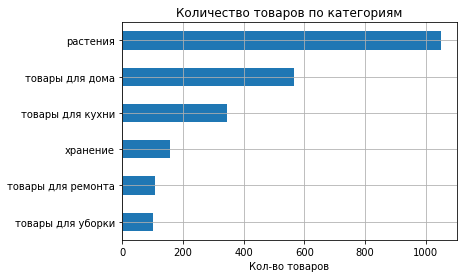

In [ ]:
df.groupby('category')['product'].nunique().sort_values().plot(kind='barh', grid=True)
plt.title('Количество товаров по категориям')
plt.ylabel(None)
plt.xlabel('Кол-во товаров');

In [ ]:
df.shape

(4807, 9)

**Вывод**

Мы преобразовали данные в таблице, подготовив для дальнейшего анализа. Теперь таблица состоит из 9 столбцов и 4807 строк. В результате удаления неявных дубликатов потеряли около 27% записей. Добавили столбцы с выручкой, месяцем покупки и категориями товаров. Самая многочисленная категория - "растения", саммые малочисленные - "товары для ремонта" и "товары для уборки".


## Исследовательский анализ данных


### Анализ количественных данных о покупателях и заказах

Определим количество клиентов и количество заказов.

In [ ]:
print(f'Количество клиентов: {df["customer_id"].nunique()}')
print(f'Количество заказов:  {df["order_id"].nunique()}')

Количество клиентов: 2394
Количество заказов:  2755


Сгруппируем данные по покупателям, посмотрим распределение показателей числа заказов, товаров и стоимости.

In [ ]:
df_grouped = df.groupby(['customer_id', 'order_id']).agg({'product':'nunique', 'quantity':'mean', 'price':'mean', 'revenue':'sum', }).reset_index()
df_grouped = df_grouped.groupby('customer_id').agg({'order_id':'count', 'product':'mean', 'quantity':'mean', 'price':'mean', 'revenue':'sum', }).reset_index()
df_grouped.columns = ['customer_id', 'orders', 'avg_products', 'avg_quantity', 'avg_price', 'sum_revenue']
df_grouped.head()

,customer_id,orders,avg_products,avg_quantity,avg_price,sum_revenue
0,000d6849-084e-4d9f-ac03-37174eaf60c4,1,4.00,1.00,138.75,555.00
1,001cee7f-0b29-4716-b202-0042213ab038,1,1.00,1.00,442.00,442.00
2,00299f34-5385-4d13-9aea-c80b81658e1b,1,1.00,2.00,457.00,914.00
3,002d4d3a-4a59-406b-86ec-c3314357e498,1,1.00,1.00,"1,649.00","1,649.00"
4,003bbd39-0000-41ff-b7f9-2ddaec152037,1,1.00,2.00,"1,162.00","2,324.00"


In [ ]:
df_grouped.describe()

,orders,avg_products,avg_quantity,avg_price,sum_revenue
count,"2,394.00","2,394.00","2,394.00","2,394.00","2,394.00"
mean,1.15,1.75,3.82,779.02,"1,710.37"
std,2.69,2.90,24.56,"1,159.10","14,423.42"
min,1.00,1.00,1.00,14.00,14.00
25%,1.00,1.00,1.00,134.00,299.25
50%,1.00,1.00,1.00,352.00,712.00
75%,1.00,1.00,1.50,974.00,"1,574.00"
max,126.00,51.00,"1,000.00","14,917.00","675,000.00"


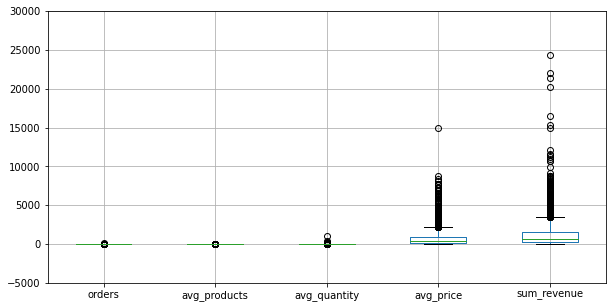

In [ ]:
df_grouped.boxplot(figsize=(10,5))
plt.ylim(-5000, 30000);

Видим, что в основном покупатели делают не более одного заказа, есть значительные выбросы в показателях количества купленного товра, стоимости и количества заказов. Вероятно существуют оптовые покупатели. Найдем таких покупателей.

In [ ]:
df.query('quantity > 100')

,date,customer_id,order_id,product,quantity,price,revenue,month,category
197,2018-10-12,cd09ea73-d9ce-48c3-b4c5-018113735e80,68611,"крепеж для пружины дверной, 1107055",150,19.00,"2,850.00",2018-10,товары для ремонта
198,2018-10-12,cd09ea73-d9ce-48c3-b4c5-018113735e80,68611,"пружина дверная 240 мм оцинкованная (д-19 мм) без крепления, 1107014",150,38.00,"5,700.00",2018-10,товары для ремонта
485,2018-11-01,aa42dc38-780f-4b50-9a65-83b6fa64e766,68815,муляж яблоко 9 см красное,170,51.00,"8,670.00",2018-11,товары для дома
503,2018-11-02,0c5aaa88-e346-4f87-8f7a-ad8cbc04e965,68831,муляж яблоко 9 см красное,140,59.00,"8,260.00",2018-11,товары для дома
1014,2018-12-11,a984c5b7-ff7e-4647-b84e-ef0b85a2762d,69289,"ручка-скоба рс-100 белая *трибатрон*, 1108035",200,29.00,"5,800.00",2018-12,товары для ремонта
2078,2019-03-23,685d3d84-aebb-485b-8e59-344b3df8b3d3,70841,плечики пластмассовые размер 52 - 54 тула 1205158,150,20.00,"3,000.00",2019-03,товары для дома
3390,2019-05-21,5d189e88-d4d6-4eac-ab43-fa65a3c4d106,71478,муляж яблоко 9 см красное,300,51.00,"15,300.00",2019-05,товары для дома
3772,2019-06-11,146cd9bf-a95c-4afb-915b-5f6684b17444,71668,вешалки мягкие для деликатных вещей 3 шт шоколад,334,148.00,"49,432.00",2019-06,товары для дома
3840,2019-06-19,312e9a3e-5fca-43ff-a6a1-892d2b2d5ba6,71743,"вантуз с деревянной ручкой d14 см красный, burstenmann, 0522/0000",1000,675.00,"675,000.00",2019-06,товары для уборки


В базе есть ряд покупателей, которые заказывали много единиц товара. Самая крупная оптовая закупка - 1000 штук вантузов в июне. Исключим только самую крупную покупку, так как она является очевидным выбросом, который может повлиять на исследование.

Найдем сколько человек совершают регулярные покупки в магазине.

In [ ]:
print(f' Не более 5% покупателей сделали более {np.percentile(df_grouped["orders"], 95)} заказов')
print(f' Не более 1% покупателей сделали более {np.percentile(df_grouped["orders"], 99)} заказов')

 Не более 5% покупателей сделали более 2.0 заказов
 Не более 1% покупателей сделали более 3.0 заказов


In [ ]:
len(df_grouped.query('orders > 3'))

8

В базе всего 8 покупателей, которые совершили более 3 покупок. 

Создадим список аномальных пользователей, чтобы можно было исключить их из анализа в дальнейшем, если потребуется. 

In [ ]:
abnormal_quantity = df_grouped.query('avg_quantity == 1000')['customer_id']
abnormal_orders = df_grouped.query('orders > 3')['customer_id']
abnormal_customers = pd.concat([abnormal_orders, abnormal_quantity]).to_list()
len(abnormal_customers)

9

### Анализ категорий товаров 

Сгруппируем данные по категориям. Выведем в отдельную таблицу. Исключим из данных аномальных покупателей

In [ ]:
df_categories = df.query('customer_id not in @abnormal_customers').copy()
df_categories = df_categories.groupby('category').agg({'customer_id':'nunique', 'order_id':'nunique', 'product':'count', 'quantity':'sum', 'price':'mean', 'revenue':['sum', 'mean']}).reset_index()
df_categories.columns = ['category', 'customers', 'orders', 'products', 'quantity', 'mean_price', 'total_revenue', 'mean_revenue']
df_categories

,category,customers,orders,products,quantity,mean_price,total_revenue,mean_revenue
0,растения,855,930,2636,4556,163.51,"602,960.00",228.74
1,товары для дома,713,749,867,3316,883.64,"1,081,583.00","1,247.50"
2,товары для кухни,323,334,394,1606,415.41,"341,938.00",867.86
3,товары для ремонта,112,116,123,1382,"1,012.98","179,923.00","1,462.79"
4,товары для уборки,98,100,110,236,"1,009.55","175,726.00","1,597.51"
5,хранение,372,389,401,506,"1,701.26","742,723.00","1,852.18"


Посмотрим, какая категория товаров самая прибыльная за все время наблюдений. Построим график.

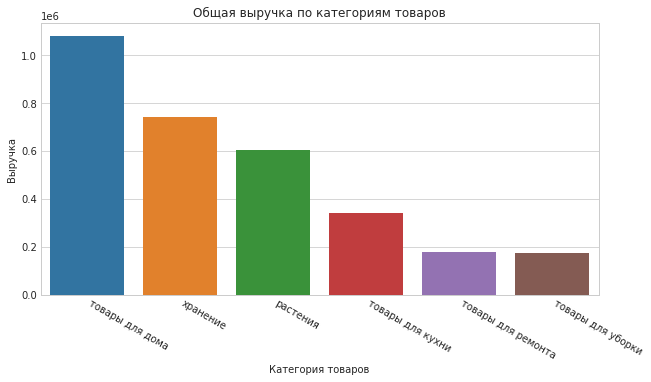

In [ ]:
fig = df_categories.sort_values(by='total_revenue', ascending=False)
plt.figure(figsize = (10,5))
with plt.style.context('seaborn-whitegrid'): 
    sns.barplot(x='category', y='total_revenue', data=fig, )
    plt.xticks(rotation=-30, ha='left')
    plt.title('Общая выручка по категориям товаров')
    plt.ylabel('Выручка')
    plt.xlabel('Категория товаров');

Видим, что больше всего прибыли приносит категория "товары для дома", меньше всего - "товары для ремонта", "товары для уборки".

Посмотрим, сколько в среднем стоят товары в той или иной категории.

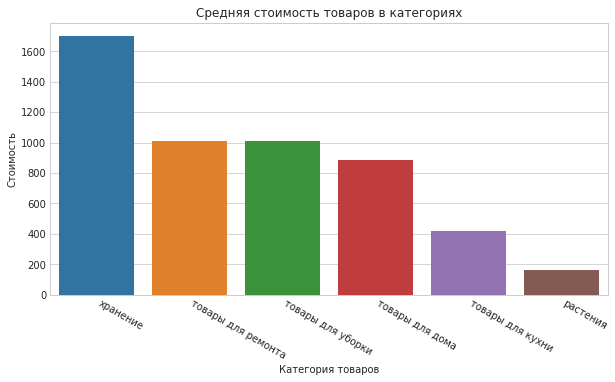

In [ ]:
fig = df_categories.sort_values(by='mean_price', ascending=False)
plt.figure(figsize = (10,5))
with plt.style.context('seaborn-whitegrid'): 
    sns.barplot(x='category', y='mean_price', data=fig, )
    plt.xticks(rotation=-30, ha='left')
    plt.title('Средняя стоимость товаров в категориях')
    plt.ylabel('Стоимость')
    plt.xlabel('Категория товаров');


Дороже всего стоят товары для хранения. Товары для ремона, уборки и для дома стоят примерно одинаково. Дешевле всего стоят растения.

Посмотрим на показатель среднего чека по категориям. Построим график.

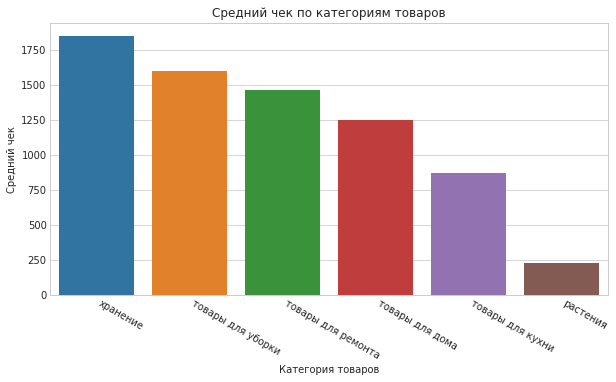

In [ ]:
fig = df_categories.sort_values(by='mean_revenue', ascending=False)
plt.figure(figsize = (10,5))
with plt.style.context('seaborn-whitegrid'): 
    sns.barplot(x='category', y='mean_revenue', data=fig, )
    plt.xticks(rotation=-30, ha='left')
    plt.title('Средний чек по категориям товаров')
    plt.ylabel('Средний чек')
    plt.xlabel('Категория товаров');

Определим какое кол-во покупателей совершали покупки в разных категориях. Построим график.

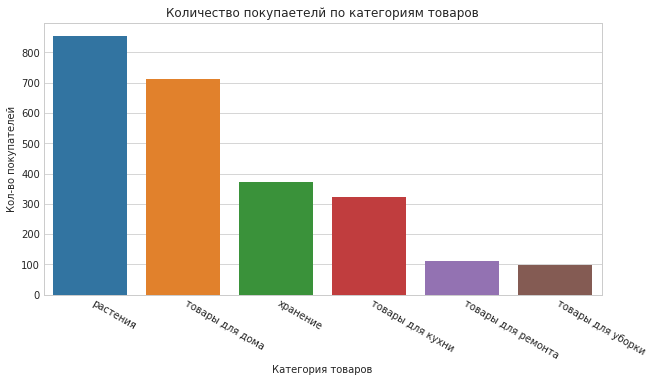

In [ ]:
fig = df_categories.sort_values(by='customers', ascending=False)
plt.figure(figsize = (10,5))
with plt.style.context('seaborn-whitegrid'): 
    sns.barplot(x='category', y='customers', data=fig, )
    plt.xticks(rotation=-30, ha='left')
    plt.title('Количество покупаетелй по категориям товаров')
    plt.ylabel('Кол-во покупателей')
    plt.xlabel('Категория товаров');


Больше всего покупателей интуресуются растениями и товарами для дома. Меньше всего - товарами для ремонта и уборки.

Наилучший средний чек в категории "хранение", товары там стоят в стернем дороже других. 

Растения стоят дешевле всего, но из-за высокого спроса по показателю общей выручки эта категория на третьем месте.

Судя по графику выручки, наиболее прибыльной можно считать категорию "товары для дома".

Найдем топ-5 самых часто покупаемых товаров в каждой категории.

In [ ]:
top_products = df.groupby(['product']).agg({'category':'first', 'customer_id':'nunique', 'price':'mean'}).sort_values(by='customer_id', ascending=False)
top_products = top_products.rename(columns={'customer_id':'customers'})

for category in top_products['category'].unique():
    display(top_products[top_products['category'] == category].sort_values(by=['customers'], ascending=False).head(5))


,category,customers,price
product,,,
пеларгония розебудная red pandora укорененный черенок,растения,61,134.92
пеларгония розебудная prins nikolai укорененный черенок,растения,50,134.83
пеларгония зональная диам. 12 см сиреневый полумахровый,растения,47,169.73
пеларгония розебудная mary укорененный черенок,растения,35,134.82
пеларгония розебудная margaretha укорененный черенок,растения,29,135.24


,category,customers,price
product,,,
сумка-тележка 2-х колесная gimi argo синяя,хранение,43,"1,072.45"
тележка багажная delta тбр-20 синий грузоподъемность 25 кг сумка и 50 кг каркас россия,хранение,16,732.81
тележка багажная delta тбр-20 коричневый с оранжевым грузоподъемность 25 кг сумка и 50 кг каркас россия,хранение,14,710.88
сумка-тележка 2-х колесная складная gimi flexi зеленая,хранение,10,"1,649.00"
тележка багажная delta тбр-15 цвет в ассортименте грузоподъемность 30 кг россия,хранение,10,644.60


,category,customers,price
product,,,
сушилка для белья настенная zalger prima 510-720 веревочная 7 линий 25 м,товары для дома,16,272.71
"таз пластмассовый со стиральной доской (иж), 1404021",товары для дома,10,339.40
сушилка для белья напольная ника сбп1/с 18 м,товары для дома,9,599.00
"ёрш унитазный с деревянной ручкой , ваир 1712012",товары для дома,8,56.50
муляж зеленое яблоко полиуретан d-6 см,товары для дома,8,22.00


,category,customers,price
product,,,
"корыто оцинкованное 45 л бесшовное, 1303007",товары для уборки,6,749.00
"швабра многофункциональная, rozenbal, r212522",товары для уборки,3,674.67
"окномойка с алюминиевой телескопической ручкой 120 см, щетка 25 см, 57572 1804047",товары для уборки,3,464.00
"щетка хозяйственная с резинкой из синтетического каучука и пластика powerslide 40х20 см голубая, leifheit, 51520",товары для уборки,2,734.00
"швабра для мытья окон leifheit hausrein с телескоп. ручкой, micro duo, 51120",товары для уборки,2,"2,624.00"


,category,customers,price
product,,,
"таз пластмассовый 40,0 л пищевой овальный (иж), 1404094",товары для кухни,5,404.00
"кувшин пластмассовый с крышкой ""кумган"" 2,0 л 1408003",товары для кухни,5,149.00
"измельчитель овощей ручной шк-4 деревянный, 3 ножа, 1516020",товары для кухни,4,479.00
"таз пластмассовый 24,0 л пищевой круглый (иж), 1404006",товары для кухни,4,239.00
салфетка protec textil polyline 30х43 см аметист белая 6230,товары для кухни,4,208.25


,category,customers,price
product,,,
"стяжка оконная с болтом ст-55 цинк, 1108354",товары для ремонта,4,20.20
"щетка-сметка 4-х рядная деревянная 300 мм (фигурная ручка) ворс 5,5 см 1801096",товары для ремонта,3,65.50
"перчатки латексные № 3 для дома утолщенные, rozenbal, r105628",товары для ремонта,2,408.00
чехол для одежды hausmann со стенкой из пвх и ручками 60х100 см gn,товары для ремонта,2,232.00
чехол для одежды hausmann со стенкой из пвх и ручками 60х100 см ag,товары для ремонта,2,232.00


Мы определили топ-5 самых популярных товаров в категориях по кол-ву покупок. Эти товары могут использоваться в персональных рекомендациях для клиентов.

### Исследование сезонности 

Посмотрим данными за какой период мы располагаем. 

In [ ]:
print(df['date'].min())
print(df['date'].max())

2018-10-01 00:00:00
2019-11-01 00:00:00


В нашем распоряжении данные за один год и один день. 

Посмотрим на распределение показателей **выручки** и **числа заказов** в зависимости от даты

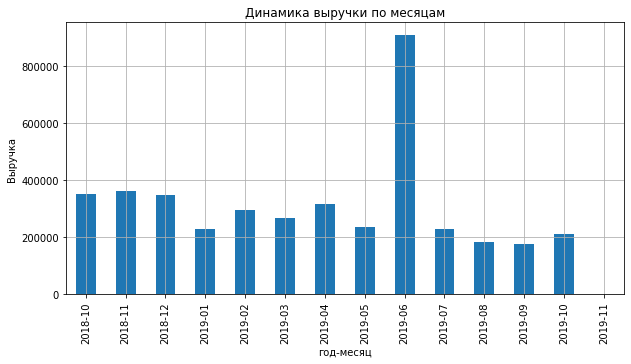

In [ ]:
df.groupby('month')['revenue'].sum().plot(kind='bar', figsize=(10, 5), grid=True);
plt.title('Динамика выручки по месяцам')
plt.ylabel('Выручка')
plt.xlabel('год-месяц');

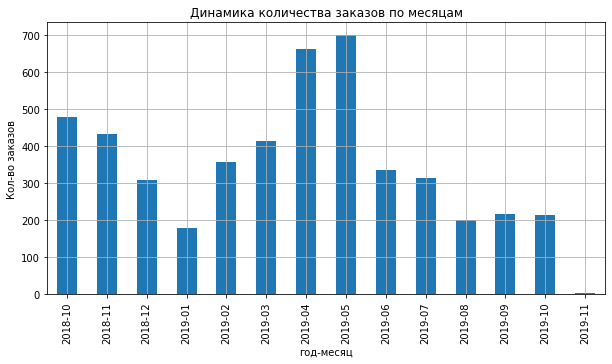

In [ ]:
df.groupby('month')['order_id'].count().plot(kind='bar', figsize=(10, 5), grid=True)
plt.title('Динамика количества заказов по месяцам')
plt.ylabel('Кол-во заказов')
plt.xlabel('год-месяц');

Посмотрим как распределены продажи **товаров из разных категорий** по месяцам.

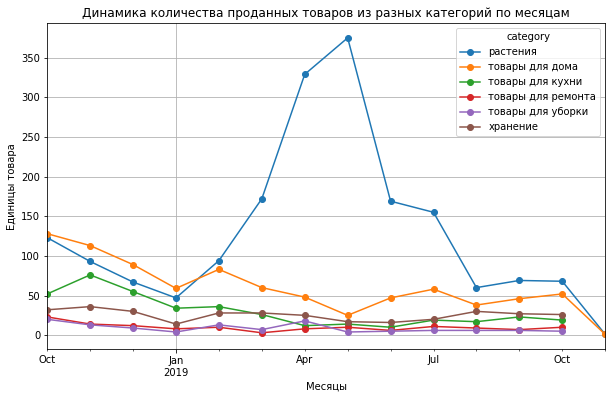

In [ ]:
(df.pivot_table(
     index='month', 
     columns='category', 
     values='product', 
     aggfunc='nunique'
     )
 .plot(
     style='o-', 
     grid=True, 
     figsize=(10, 6)
     )
 )
plt.title('Динамика количества проданных товаров из разных категорий по месяцам')
plt.ylabel('Единицы товара')
plt.xlabel('Месяцы');

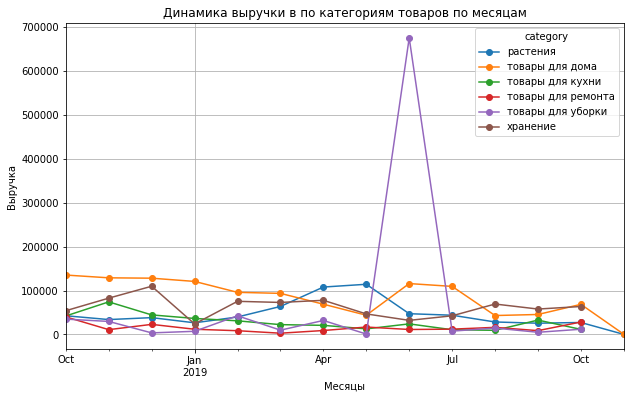

In [ ]:
(df.pivot_table(
     index='month', 
     columns='category', 
     values='revenue', 
     aggfunc='sum'
     )
 .plot(
     style='o-', 
     grid=True, 
     figsize=(10, 6)
     )
 )
plt.title('Динамика выручки в по категориям товаров по месяцам')
plt.ylabel('Выручка')
plt.xlabel('Месяцы');

Как видно из графиков, показатель общей выручки находится примерно на одном уровне в течение года. Заметный всплеск продаж наблюдается только в июне, когда была оптовая закупка вантузов. 

Наибольшее количество заказов наблюдается в апреле и мае. В этот период активно закупают рассаду и растения, выручка за эту категорию в этот период выше, чем по другим категориям. В январе заказов меньше всего. 

Стабильно высокий спрос наблюдается на товары для дома, выручка по этой категории в течение года также высокая, кроме месяцев: апрель, май, август, сентябрь. Стабильно низкий спрос на товары для ремонта и уборки.

### Сегментация покупателей по покупательской активности

Проведем кластеризацию на основе числовых данных о покупателях с помощью машинного обучения. Стандартизируем данные. Исключим из стандартизации аномальных пользователей.

In [ ]:
df_grouped = df_grouped.query('customer_id not in @abnormal_customers').copy()
df_grouped.head()

,customer_id,orders,avg_products,avg_quantity,avg_price,sum_revenue
0,000d6849-084e-4d9f-ac03-37174eaf60c4,1,4.00,1.00,138.75,555.00
1,001cee7f-0b29-4716-b202-0042213ab038,1,1.00,1.00,442.00,442.00
2,00299f34-5385-4d13-9aea-c80b81658e1b,1,1.00,2.00,457.00,914.00
3,002d4d3a-4a59-406b-86ec-c3314357e498,1,1.00,1.00,"1,649.00","1,649.00"
4,003bbd39-0000-41ff-b7f9-2ddaec152037,1,1.00,2.00,"1,162.00","2,324.00"


In [ ]:
scaler = StandardScaler()
x_sc = scaler.fit_transform(df_grouped.drop('customer_id', axis = 1))

Построим матрицу расстояний на стандартизованной матрице признаков и отобразим дендрограмму.

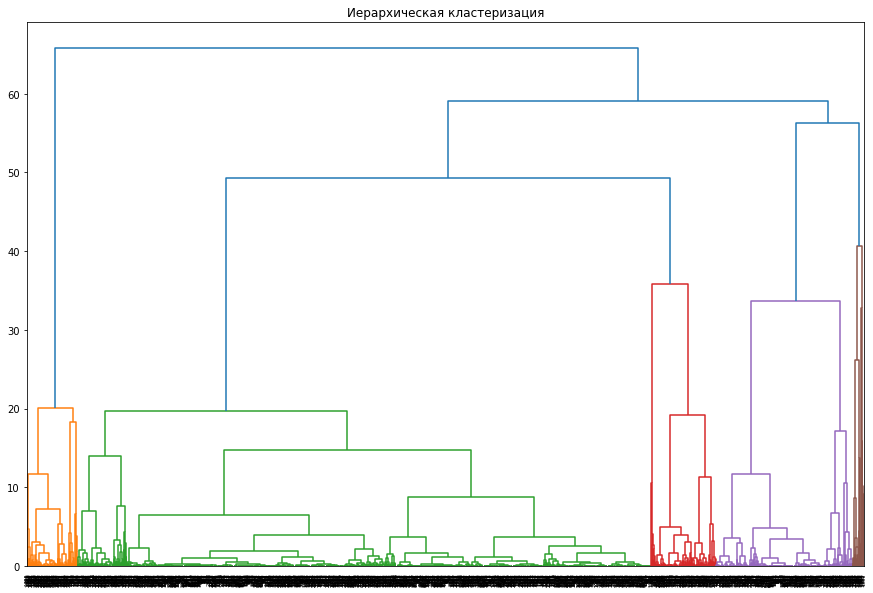

In [ ]:
linked = linkage(x_sc, method = 'ward') 

plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Иерархическая кластеризация')
plt.show()

Дендрограмма показывает разделение на 5 кластеров. Используем аглоритм `K-Means` для прогнозирования кластеров. Добавим в датафрейм `df_grouped` столбец с присвоенными значениями кластеров.

In [ ]:
km = KMeans(n_clusters=5, random_state=0) # определим количество кластеров равное пяти
labels = km.fit_predict(x_sc) 

df_grouped['cluster'] = labels

In [ ]:
df_grouped.head()

,customer_id,orders,avg_products,avg_quantity,avg_price,sum_revenue,cluster
0,000d6849-084e-4d9f-ac03-37174eaf60c4,1,4.00,1.00,138.75,555.00,0
1,001cee7f-0b29-4716-b202-0042213ab038,1,1.00,1.00,442.00,442.00,0
2,00299f34-5385-4d13-9aea-c80b81658e1b,1,1.00,2.00,457.00,914.00,0
3,002d4d3a-4a59-406b-86ec-c3314357e498,1,1.00,1.00,"1,649.00","1,649.00",0
4,003bbd39-0000-41ff-b7f9-2ddaec152037,1,1.00,2.00,"1,162.00","2,324.00",0


### Анализ характеристик сегментированных пользователей

Посмотрим на средние значения признаков для кластеров и на количество людей в кластерах.

In [ ]:
df_grouped.groupby('cluster').mean()

,orders,avg_products,avg_quantity,avg_price,sum_revenue
cluster,,,,,
0,1.00,1.31,2.73,523.84,813.78
1,1.07,1.40,135.26,209.78,"15,639.33"
2,1.02,13.93,1.31,127.71,"2,079.46"
3,1.02,1.05,1.43,"3,815.97","4,451.15"
4,2.14,1.75,2.64,520.89,"1,813.73"


In [ ]:
df_grouped.groupby('cluster')['customer_id'].count().to_frame()

,customer_id
cluster,
0,1950
1,15
2,83
3,197
4,140


Мы выделили 5 кластеров пользователей по числовым показателям. 

Кластер 0 значительно превосходит другие по численности. Это говорит о том, что большинство покупателей обладают схожей покупательской активностью. В самый маленький кластер очевидно выделились оптовые закупки. 

Судя по таблице, самые заметные различия между кластерами в средней стоимости приобретаемых товаров, выручке, среднему кол-ву приобретаемых единиц товаров. Используем информацию из этой таблицы в дальнейшем для общего описания кластеров. 

Создадим объединенную таблицу `df_full`. Добавим столбец с обозначением кластеров к общей таблице `df`, из которй предварительно исключаем аномальных пользователей.

In [ ]:
df_full = df.query('customer_id not in @abnormal_customers').copy()
df_full = df_full.merge(df_grouped[['customer_id', 'cluster']], on='customer_id')
df_full.head(3)

,date,customer_id,order_id,product,quantity,price,revenue,month,category,cluster
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.00,142.00,2018-10,растения,0
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12, h25",1,194.00,194.00,2018-10,растения,0
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.00,112.00,2018-10,растения,0


Посмотрим, товары каких **категорий** приобретали клиенты из разных кластеров. Выведем таблицу и график.

customer_id
cluster category                       
0       растения                    697
        товары для дома             585
        товары для кухни            294
        товары для ремонта           84
        товары для уборки            74
        хранение                    259
1       товары для дома               6
        товары для кухни              3
        товары для ремонта            5
        хранение                      1
2       растения                     80
        товары для дома              11
        товары для кухни              5
        товары для ремонта            2
        товары для уборки             3
        хранение                      3
3       растения                      7
        товары для дома              64
        товары для кухни              5
        товары для ремонта           15
        товары для уборки            16
        хранение                     90
4       растения                     71
        товары для дома              47
        товары для кухни             16
        товары для ремонта            6
        товары для уборки             5
        хранение                     19

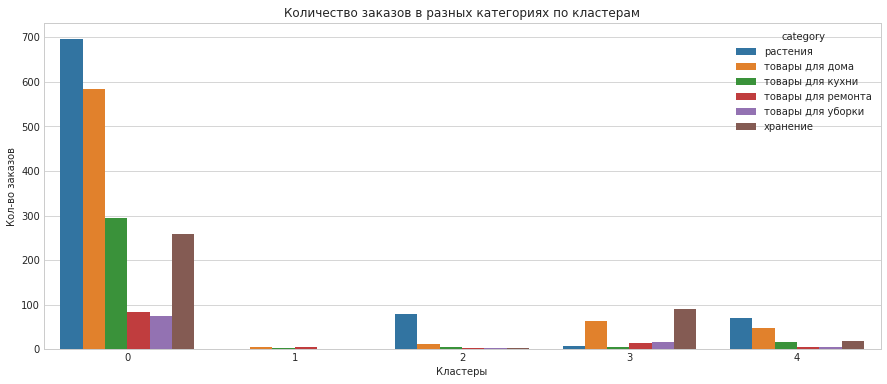

In [ ]:
fig = df_full.groupby(['cluster', 'category']).agg({'customer_id':'nunique'})
display(fig)

plt.figure(figsize=(15, 6))
with plt.style.context('seaborn-whitegrid'):
    sns.barplot(x = "cluster", y = "customer_id", hue = "category", data = fig.reset_index());
    plt.title('Количество заказов в разных категориях по кластерам')
    plt.xlabel('Кластеры')
    plt.ylabel('Кол-во заказов');

Рассмотрим кластеры отдельно, на разных масштабах, чтобы было лучше видно распределение заказов по категориям.

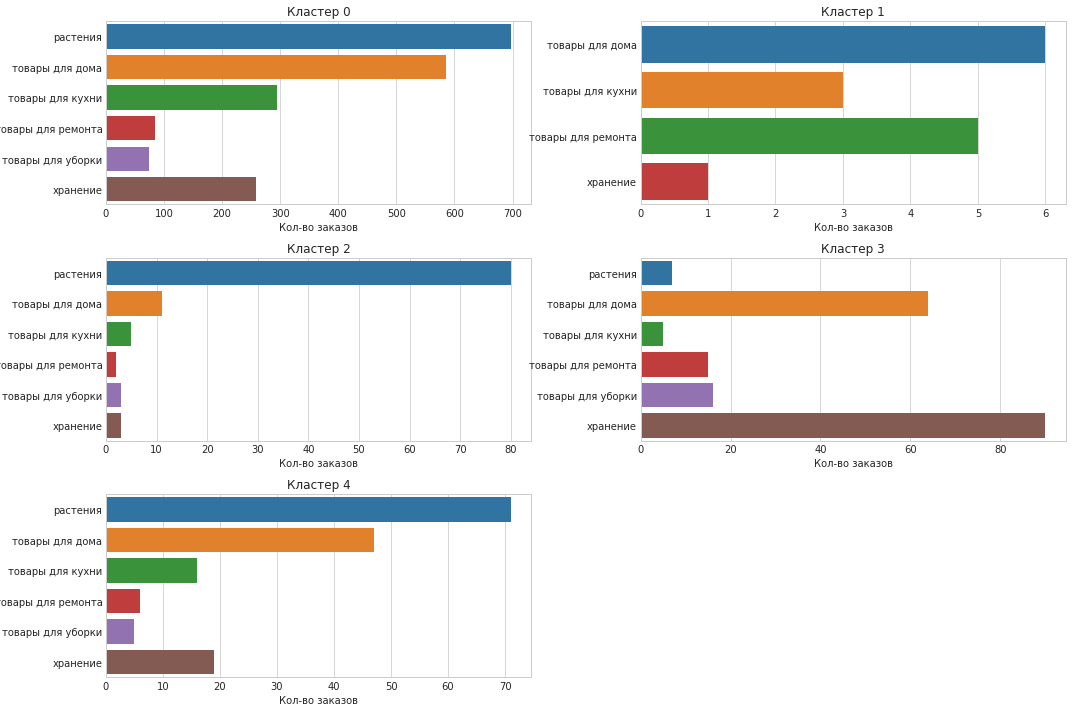

In [ ]:
plt.figure(figsize=(15, 10))
with plt.style.context('seaborn-whitegrid'):
    plt.subplot(3, 2, 1)
    fig1 = df_full.query('cluster == 0').groupby('category').agg({'customer_id':'nunique'}).reset_index()
    sns.barplot(x ="customer_id", y = "category", data = fig1).set_title("Кластер 0")
    plt.xlabel('Кол-во заказов')
    plt.ylabel(None);
    plt.subplot(3, 2, 2)
    fig2 = df_full.query('cluster == 1').groupby('category').agg({'customer_id':'nunique'}).reset_index()
    sns.barplot(x ="customer_id", y = "category", data = fig2).set_title("Кластер 1")
    plt.xlabel('Кол-во заказов')
    plt.ylabel(None);
    plt.subplot(3, 2, 3)
    fig3 = df_full.query('cluster == 2').groupby('category').agg({'customer_id':'nunique'}).reset_index()
    sns.barplot(x ="customer_id", y = "category", data = fig3).set_title("Кластер 2")
    plt.xlabel('Кол-во заказов')
    plt.ylabel(None);
    plt.subplot(3, 2, 4)
    fig4 = df_full.query('cluster == 3').groupby('category').agg({'customer_id':'nunique'}).reset_index()
    sns.barplot(x ="customer_id", y = "category", data = fig4).set_title("Кластер 3")
    plt.xlabel('Кол-во заказов')
    plt.ylabel(None);
    plt.subplot(3, 2, 5)
    fig5 = df_full.query('cluster == 4').groupby('category').agg({'customer_id':'nunique'}).reset_index()
    sns.barplot(x ="customer_id", y = "category", data = fig5).set_title("Кластер 4")
    plt.xlabel('Кол-во заказов')
    plt.ylabel(None);
    plt.tight_layout() 


Интересы покупателей распространяются на все категории товаров, где-то в большей, где-то в меньшей степени. Покупатели из кластера 0 чаще покупают растения, товары для дома. Покупатели из кластера 2 в основном приобретают растения, покупатели из кластера 3 в большей степени интересуются товарами для дома и для хранения. Кластер 4 похож на кластер 0 по распределению заказов. К товарам категорий "товары для уборки" и "товары для ремонта" во всех трех кластерах интерес довольно низкий.

Посмотрим как распределено количество заказов в разных кластерах в зависимости от месяца года. 

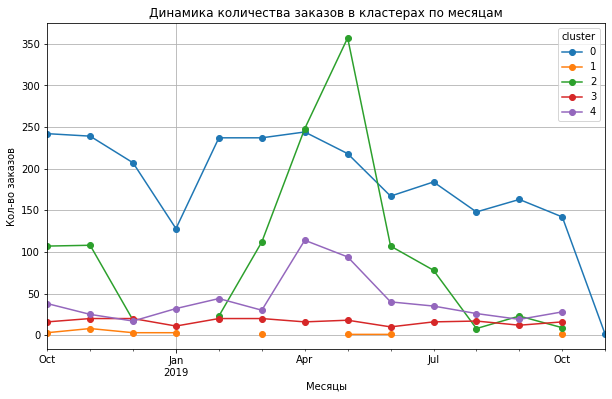

In [ ]:
(df_full.pivot_table(
     index='month', 
     columns='cluster', 
     values='order_id', 
     aggfunc='count'
     )
 .plot(
     style='o-', 
     grid=True, 
     figsize=(10, 6)
     )
 )
plt.title('Динамика количества заказов в кластерах по месяцам')
plt.ylabel('Кол-во заказов')
plt.xlabel('Месяцы');

Судя по графику, стабильно мало заказов в течение года в кластере 3. Кол-во заказов в кластере 0 высокое, колеблется в течение года. Есть провал в январе и увеличение количества в октябре, ноябре и с марта по май. В кластере 2 есть ярко выраженная сезонность, с марта по июль количество заказов резко увеличивается. Это напрямую связано с предпочитаемой категорией товаров - "растения", пик продаж приходится на время садовых работ.

## Проверка гипотез

### Разница в среднем чеке между кластерами

Посчитаем статистическую значимость различий в среднем чеке между кластерами на основе товарных категорий. 

- Н0: Нет статистически значимых различий между средними чеками кластеров. 
- H1: Существует статистически значимая разница в средних чеках между кластерами. 

Применим тест Манна-Уитни. Параметр pvalue = 0.05. Применим поправку Бонферрони для корректировки уровня значимости при множественном сравнении.

In [ ]:
def hypothesis_testing1(cluster, alpha):   # аргумент cluster - номер кластера, скоторым сравниваются остальные. alpha -  уровень статистической значимости 
    numbers = df_full[df_full['cluster'] != cluster]['cluster'].sort_values().unique()    # список с номерами кластеров для сравнения
    for num in numbers:
        alpha = alpha
        p_value = stats.mannwhitneyu(df_full[df_full['cluster']==cluster]['revenue'], df_full[df_full['cluster']==num]['revenue'])[1]
        
        bonferroni_alpha = alpha / 4  # произведено 4 сравнения
        
        print('p-значение: ', '{0:.5f}'.format(p_value))
        if p_value < bonferroni_alpha:
            print(f'Отвергаем нулевую гипотезу: между кластерами {cluster} и {num} есть значимая разница')
        else:
            print(f'Не получилось отвергнуть нулевую гипотезу, нет оснований считать кластеры {cluster} и {num} разными')         

In [ ]:
hypothesis_testing1(0, 0.05)

p-значение:  0.00000
Отвергаем нулевую гипотезу: между кластерами 0 и 1 есть значимая разница
p-значение:  0.00000
Отвергаем нулевую гипотезу: между кластерами 0 и 2 есть значимая разница
p-значение:  0.00000
Отвергаем нулевую гипотезу: между кластерами 0 и 3 есть значимая разница
p-значение:  0.00000
Отвергаем нулевую гипотезу: между кластерами 0 и 4 есть значимая разница


In [ ]:
hypothesis_testing1(1, 0.05)

p-значение:  0.00000
Отвергаем нулевую гипотезу: между кластерами 1 и 0 есть значимая разница
p-значение:  0.00000
Отвергаем нулевую гипотезу: между кластерами 1 и 2 есть значимая разница
p-значение:  0.30567
Не получилось отвергнуть нулевую гипотезу, нет оснований считать кластеры 1 и 3 разными
p-значение:  0.00000
Отвергаем нулевую гипотезу: между кластерами 1 и 4 есть значимая разница


In [ ]:
hypothesis_testing1(2, 0.05)

p-значение:  0.00000
Отвергаем нулевую гипотезу: между кластерами 2 и 0 есть значимая разница
p-значение:  0.00000
Отвергаем нулевую гипотезу: между кластерами 2 и 1 есть значимая разница
p-значение:  0.00000
Отвергаем нулевую гипотезу: между кластерами 2 и 3 есть значимая разница
p-значение:  0.00000
Отвергаем нулевую гипотезу: между кластерами 2 и 4 есть значимая разница


In [ ]:
hypothesis_testing1(3, 0.05)

p-значение:  0.00000
Отвергаем нулевую гипотезу: между кластерами 3 и 0 есть значимая разница
p-значение:  0.30567
Не получилось отвергнуть нулевую гипотезу, нет оснований считать кластеры 3 и 1 разными
p-значение:  0.00000
Отвергаем нулевую гипотезу: между кластерами 3 и 2 есть значимая разница
p-значение:  0.00000
Отвергаем нулевую гипотезу: между кластерами 3 и 4 есть значимая разница


 Результаты теста показывают, что между кластерами есть значимая разница в показателях среднего чека, за исключением кластеров 1 и 3. Возможно тест выдает такой результат из-за малого количества данных в кластере 1.

### Разница в среднем чеке в зависимости от месяца

- H0: Нет статистически значимой разницы в средних чеках кластера за два одинаковых месяца в разные годы. 
- H1: Есть статистически значимая разница в средних чеках кластера за два одинаковых месяца в разные годы. 

Применим тест Манна-Уитни. Параметр pvalue = 0.05.

In [ ]:
def hypothesis_testing2(cluster, data1, data2, alpha):   # дата вводится в формате "YYYY-MM"
     
    print('Сравнение периодов: ', data1, 'и', data2)
    try:
        alpha = alpha
        p_value = stats.mannwhitneyu(df_full[(df_full['cluster']==cluster) & (df_full['month']==data1)]['revenue'],
                                    df_full[(df_full['cluster']==cluster) & (df_full['month']==data2)]['revenue'])[1]
            
        print('p-значение: ', '{0:.5f}'.format(p_value))
        if p_value < alpha:
            print(f'Отвергаем нулевую гипотезу: между значениями кластера {cluster} в указанные периоды есть значимая разница')
        else:
            print(f'Не получилось отвергнуть нулевую гипотезу, нет оснований считать значения кластера {cluster} в указанные периоды разными')                 
    except:
        print('Недостаточно данных')

In [ ]:
hypothesis_testing2(0, "2018-10", "2019-10", 0.05)

Сравнение периодов:  2018-10 и 2019-10
p-значение:  0.50401
Не получилось отвергнуть нулевую гипотезу, нет оснований считать значения кластера 0 в указанные периоды разными


In [ ]:
hypothesis_testing2(1, "2018-10", "2019-10", 0.05)

Сравнение периодов:  2018-10 и 2019-10
p-значение:  0.80000
Не получилось отвергнуть нулевую гипотезу, нет оснований считать значения кластера 1 в указанные периоды разными


In [ ]:
hypothesis_testing2(2, "2018-10", "2019-10", 0.05)

Сравнение периодов:  2018-10 и 2019-10
p-значение:  0.66053
Не получилось отвергнуть нулевую гипотезу, нет оснований считать значения кластера 2 в указанные периоды разными


In [ ]:
hypothesis_testing2(3, "2018-10", "2019-10", 0.05)

Сравнение периодов:  2018-10 и 2019-10
p-значение:  0.09336
Не получилось отвергнуть нулевую гипотезу, нет оснований считать значения кластера 3 в указанные периоды разными


In [ ]:
hypothesis_testing2(4, "2018-10", "2019-10", 0.05)

Сравнение периодов:  2018-10 и 2019-10
p-значение:  0.88126
Не получилось отвергнуть нулевую гипотезу, нет оснований считать значения кластера 4 в указанные периоды разными


Тест показал отсутствие значимой разницы средних чеков кластеров в октябре 2018 и 2019 года. Таким образом можно сравнить данные и за другие периоды, но в нашей выборке есть данные по двум годам только за октябрь. Результаты тестирования могут быть не очень показательны, если в какой-то период будет малое количество заказов.

## Выводы и рекомендации


Мы провели анализ базы данных с транзакциями интернет-магазина товаров для дома и быта за один год. На этапе предобработки данных было удалено 27% дубликатов, это одинаковые заказы с разными датами, и заказы, оформленные на нескольких пользователей. Также на этом этапе был исправлен формат даты, выделены колонки с месяцем покупки и общей выручкой по заказу, сформированы 6 товарных категорий на основе наименований товаров. 

В ходе анализа мы установили, что всего 8 покупателей (менее 1%) сделали более 3-х заказов, в базе есть 1 покупатель аномально большого числа товаров для уборки. Этих покупателей мы выделили в отдельный список и не использовали при сегментации пользователей.

Исследование сезонности показало, что выручка не сильно зависит от месяца, резкий всплеск в июне обусловлен одной оптовой закупкой. Чуть выше выручка в октябре, ноябре и декабре, ниже всего - в августе и сентябре. 
По количеству заказов самый провальный месяц - январь, а самые удачные - апрель, май, в этот период активно закупают рассаду и растения. Спрос на растения заметно повышается с марта по июль. Стабильно высокий спрос наблюдается на товары для дома.

Наблюдается стабильно низкий спрос на товары для ремонта и уборки. Это может быть связано с маленьким ассортиментом, т.к. по количеству товаров эти категории как раз на последнем месте. Возможно, расширение ассортимента приведет к увеличению продаж.

Мы сегментировали пользователей на 5 кластеров по показателям покупательской активности. Также рассморели кластеры в разрезе покупаемых ими товаров и сезонности. 

При составлении предложений предлагаем учитывать стоимость товаров, не предлагать слишком дорогие товары тем, кто в основном покупает дешевые, и наоборот. По графику средней стоимости мы определили среднюю стоимость товаров и будем ориентироваться на эти цифры: Хранение - 1700 руб, товары для ремонта - 1000 руб., товары для уборки - 1000руб, товары для дома - 900руб., товары для кухни - 400руб, рустения - 180руб. 

Таким образом можно сформулировать следующие выводы и рекомендации: 

*Кластер 0*
- самый многочисленный (1950 покупателей)
- покупатели сделали по 1 заказу. Задача подтолкнуть к совершению повторной покупки.
- покупают не много, в среднем около 1,3 разных наименований в количестве около 3 штук.
- средняя стоимость купленных товаров ниже средней, показатель выручки самый низкий среди кластеров.
- интересуются товарами из всех категорий, наиболее активно товарами для дома и растениями. Также можно предлагать товары для хранения и для кухни. 
- стоимость предлагаемых товаров желательна в районе ниже средней. 
- актуальный период для предложений: в течение всего года, за исключением января.


*Кластер 1*
- количество покупателей - 15
- покупали в среднем 1.4 наименования, но в большом количестве. Возможно, для нужд частного бизнеса. 
- покупали дешевые товары, но за счет количества, на первом месте по показателю выручки 
- закупали чаще товары для дома и товары для ремонта и кухонные товары. 
- заказы совершались в осенние и зимние месяцы, а также в мае, июне. 

*Кластер 2*
- количество покупателей - 83
- добавляли в среднем около 14 разных позиций в заказ
- покупали самые недорогие товары, у кластера средний показатель выручки
- инрересуются в первую очередь растениями, можно предлагать также товары, касающиеся садовых работ.
- актуальный период для предложений: октябрь, ноябрь, март-июль, в этот период наблюдается резкий рост заказов. 
- рекомендуем предлагать товары низкой стоимости.

*Кластер 3*
- количество покупателей - 197
- покупали в среднем 1 наименование товара, в количестве пары штук
- покупают товары по цене выше среднего, показатель выручки в кластере высокий
- категории повышенного интереса: товары для хранения и товары для дома
- активность стабильно низкая в течение всего года, без заметных всплесков.
- стоимость предлагаемых товаров может быть выше среднего

*Кластер 4*
- количество покупателей - 140
- по показателям и категориям товаров схож с кластером 0, с той разницей, что покупатели сделали повторные заказы. Этот кластер может быть наиболее отзывчив к предложениям. Люди из кластера 0, вероятно, при повторных заказах будут перемещаться в этот кластер. 
- добавляли в среднем около 1.7 позиций в заказ, в количестве около 2.6 штук 
- стоимость предлагаемых товаров желательна ниже средней.
- активность стабильная в течение года, с пиком в апреле и мае. 

Для всех кластеров может быть актуально предлагать товары из топ-5 самых популярных в интересующих их категориях.
Судя по графику выручки, наиболее прибыльной можно считать категорию "товары для дома", поэтому рекомендуем включать в рекомендации для каждого кластера товары из этой категории.
